In [14]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy
from tensorflow.python.client import device_lib
import tensorflow_hub as hub

sns.set()

import warnings

warnings.filterwarnings("ignore")

In [2]:
print("--- TEST de présence de CUDA ---")
tensorflow_with_cuda = tf.test.is_built_with_cuda()
print("CUDA dans Tensorflow : " + str(tensorflow_with_cuda))
print(tf.config.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

--- TEST de présence de CUDA ---
CUDA dans Tensorflow : True
[]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3369248130840438748
xla_global_id: -1
]


2022-10-14 10:33:22.299525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-14 10:33:22.299970: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-14 10:33:22.299996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (baudu-TM1701): /proc/driver/nvidia/version does not exist
2022-10-14 10:33:22.301750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
pizza_dir = './pizza-not-pizza/pizza'
not_pizza_dir = './pizza-not-pizza/not_pizza'
data_dir = './pizza-not-pizza'

In [4]:
epoch = 7

In [5]:
num_pizza_images = len(os.listdir(pizza_dir))
non_pizza_images = len(os.listdir(not_pizza_dir))
print(f'Number of Pizza images: {num_pizza_images}')
print(f'Number of Non-Pizza images: {non_pizza_images}')

Number of Pizza images: 983
Number of Non-Pizza images: 983


In [6]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255., validation_split=0.1)

train_data = data_gen.flow_from_directory(data_dir,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset='training',
                                          class_mode='binary')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        subset='validation',
                                        class_mode='binary')

Found 1770 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [7]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = sns.lineplot(x=epochs, y=loss, label='Training Loss', ax=ax[0])
    ax1 = sns.lineplot(x=epochs, y=val_loss, label='Test Loss', ax=ax[0])
    ax1.set(title='Loss', xlabel='Epochs')

    ax2 = sns.lineplot(x=epochs, y=accuracy, label='Training Accuracy', ax=ax[1])
    ax2 = sns.lineplot(x=epochs, y=val_accuracy, label='Test Accuracy', ax=ax[1])
    ax2.set(title='Accuracy', xlabel='Epochs')

## PMC

Epoch 1/7


2022-10-14 10:07:19.963736: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2022-10-14 10:07:20.593723: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19267584 exceeds 10% of free system memory.
2022-10-14 10:07:20.612878: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321126400 exceeds 10% of free system memory.
2022-10-14 10:07:20.813607: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321126400 exceeds 10% of free system memory.


 1/56 [..............................] - ETA: 1:02 - loss: 0.6946 - accuracy: 0.5312

2022-10-14 10:07:21.181091: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 321126400 exceeds 10% of free system memory.


56/56 [==============================] - 30s 533ms/step - loss: 13.4395 - accuracy: 0.5672 - val_loss: 1.8724 - val_accuracy: 0.6786
Epoch 2/7
56/56 [==============================] - 28s 506ms/step - loss: 1.3324 - accuracy: 0.6734 - val_loss: 2.4963 - val_accuracy: 0.5153
Epoch 3/7
56/56 [==============================] - 28s 496ms/step - loss: 1.1459 - accuracy: 0.6853 - val_loss: 3.5415 - val_accuracy: 0.5204
Epoch 4/7
56/56 [==============================] - 28s 498ms/step - loss: 1.1239 - accuracy: 0.7164 - val_loss: 1.6783 - val_accuracy: 0.6276
Epoch 5/7
56/56 [==============================] - 28s 494ms/step - loss: 0.4451 - accuracy: 0.8441 - val_loss: 1.5970 - val_accuracy: 0.6327
Epoch 6/7
56/56 [==============================] - 28s 508ms/step - loss: 0.3178 - accuracy: 0.8791 - val_loss: 0.9971 - val_accuracy: 0.6531
Epoch 7/7
56/56 [==============================] - 28s 496ms/step - loss: 0.1827 - accuracy: 0.9311 - val_loss: 0.9432 - val_accuracy: 0.6684


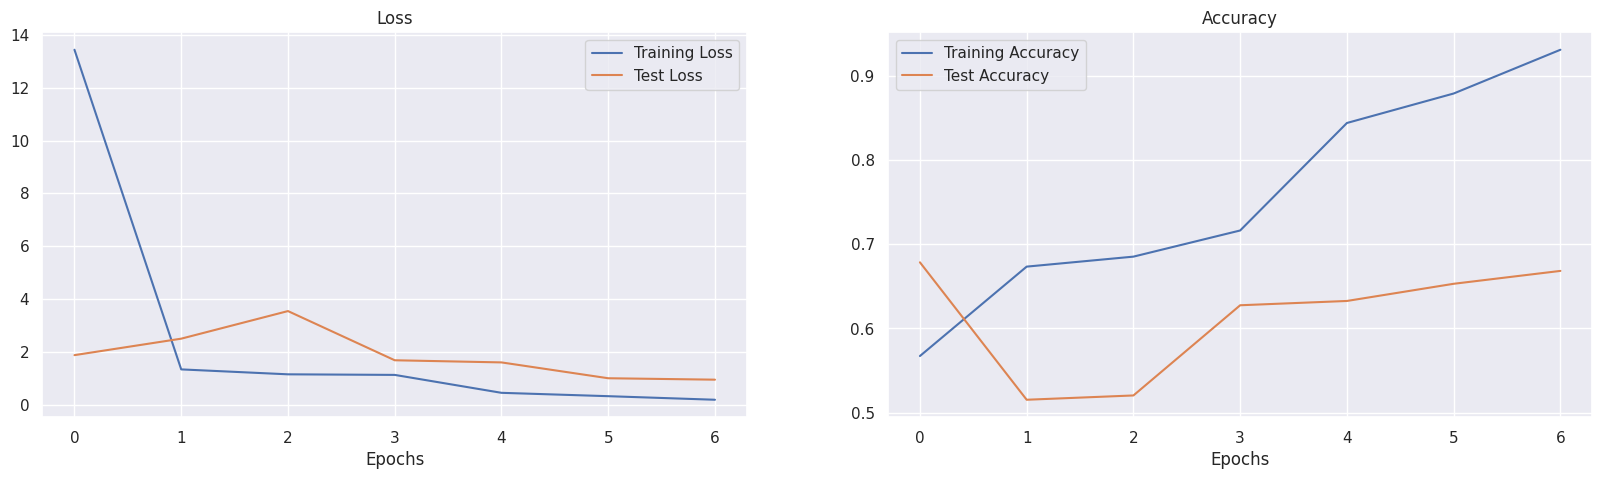

In [8]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # Input layer
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model_1.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=epoch,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))
plot_loss_curves(history_1)

## CNN

### Convolation sans couche cache

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # Input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model_2.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=epoch,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))
plot_loss_curves(history_2)

Epoch 1/7
56/56 [==============================] - 49s 816ms/step - loss: 0.8161 - accuracy: 0.5791 - val_loss: 0.5852 - val_accuracy: 0.7398
Epoch 2/7
56/56 [==============================] - 44s 781ms/step - loss: 0.5653 - accuracy: 0.7102 - val_loss: 0.5235 - val_accuracy: 0.7602
Epoch 3/7
56/56 [==============================] - 52s 926ms/step - loss: 0.5302 - accuracy: 0.7345 - val_loss: 0.5491 - val_accuracy: 0.7653
Epoch 4/7
15/56 [=======>......................] - ETA: 1:31 - loss: 0.5069 - accuracy: 0.7625

### Convolution avec couche cache

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),  # Input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=epoch,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))
plot_loss_curves(history_1)

## Data Augmentation

In [ ]:
# Defining data generator with Data Augmentation
data_gen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.,
                                                                     validation_split=0.2,
                                                                     zoom_range=0.2,
                                                                     horizontal_flip=True,
                                                                     rotation_range=20,
                                                                     width_shift_range=0.2,
                                                                     height_shift_range=0.2)

print('Augmented training Images:')
train_data_augmented = data_gen_augmented.flow_from_directory(data_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              subset='training',
                                                              class_mode='binary')

print('Unchanged Validation Images:')
val_data = data_gen.flow_from_directory(data_dir,
                                        target_size=(224, 224),
                                        batch_size=32,
                                        subset='validation',
                                        class_mode='binary')

### PMC

In [ ]:
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_1_1 = model_1.fit(train_data_augmented,
                          epochs=epoch,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=val_data,
                          validation_steps=len(val_data))
print("Le premier graphique correspond aux données normales, le second au données augmentées")
plot_loss_curves(history_1)
plot_loss_curves(history_1_1)

### CNN sans couche

In [ ]:
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_2_1 = model_2.fit(train_data_augmented,
                          epochs=epoch,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=val_data,
                          validation_steps=len(val_data))

print("Le premier graphique correspond aux données normales, le second au données augmentées")
plot_loss_curves(history_2)
plot_loss_curves(history_2_1)

### CNN avec couche

In [ ]:
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

history_3_1 = model_3.fit(train_data_augmented,
                          epochs=epoch,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=val_data,
                          validation_steps=len(val_data))
print("Le premier graphique correspond aux données normales, le second au données augmentées")
plot_loss_curves(history_3)
plot_loss_curves(history_3_1)

## Transfer Learning

In [15]:
url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(url,
                                         trainable=False,
                                         input_shape=(224, 224, 3))

model_vgg = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_vgg.compile(loss=tf.losses.BinaryCrossentropy(),
                  optimizer='adam',
                  metrics=['accuracy'])

history_vgg = model_vgg.fit(train_data,
                            epochs=3,
                            steps_per_epoch=len(train_data),
                            validation_data=val_data,
                            validation_steps=len(val_data))
plot_loss_curves(history_vgg)


Epoch 1/7
56/56 [==============================] - 422s 7s/step - loss: 0.2663 - accuracy: 0.9226 - val_loss: 0.1574 - val_accuracy: 0.9388
Epoch 2/7
56/56 [==============================] - 408s 7s/step - loss: 0.1207 - accuracy: 0.9593 - val_loss: 0.1387 - val_accuracy: 0.9541
Epoch 3/7
 9/56 [===>..........................] - ETA: 5:03 - loss: 0.1327 - accuracy: 0.9549


KeyboardInterrupt



Au bout de 3 epochs, l'apprentissage se stabilise
Feature vectors of EfficientNet models trained on Imagenet


In [ ]:
import torch
import cv2

cap = cv2.VideoCapture('https://media.ptitbiomed.fr/18013564.mp4')
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite('./torch/old' + str(i) + '.jpg', frame)
    i += 1

cap.release()
cv2.destroyAllWindows()

from os import walk

filenames = next(walk('./torch'), (None, None, []))[2]  # [] if no file
filenames = [ './torch/' + x for x in filenames]
print(filenames)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


results = model(filenames)

results.print()
results.show()

Using cache found in /home/baudu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-28 Python-3.10.6 torch-1.12.1+cu102 CPU

Fusing layers... 


['./torch/old270.jpg', './torch/old680.jpg', './torch/old513.jpg', './torch/old220.jpg', './torch/old290.jpg', './torch/old9.jpg', './torch/old452.jpg', './torch/old736.jpg', './torch/old673.jpg', './torch/old676.jpg', './torch/old622.jpg', './torch/old317.jpg', './torch/old426.jpg', './torch/old380.jpg', './torch/old618.jpg', './torch/old174.jpg', './torch/old239.jpg', './torch/old189.jpg', './torch/old502.jpg', './torch/old116.jpg', './torch/old62.jpg', './torch/old216.jpg', './torch/old214.jpg', './torch/old261.jpg', './torch/old568.jpg', './torch/old690.jpg', './torch/old670.jpg', './torch/old206.jpg', './torch/old429.jpg', './torch/old641.jpg', './torch/old84.jpg', './torch/old119.jpg', './torch/old689.jpg', './torch/old296.jpg', './torch/old148.jpg', './torch/old461.jpg', './torch/old112.jpg', './torch/old19.jpg', './torch/old407.jpg', './torch/old277.jpg', './torch/old125.jpg', './torch/old623.jpg', './torch/old352.jpg', './torch/old295.jpg', './torch/old265.jpg', './torch/old71

YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
